Imports

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit

Data loading

In [18]:
# Data loading
df = pd.read_csv('Similar_compounds_Seahorse_for_plotting.csv')

# Select data
df = df[~df['Group'].str.contains('NOTHING|Background')]

df

,Measurement,Well,Group,Time,OCR,ECAR,PER
240,1,B02,FCCP,1.55,21.63,13.18,0
241,1,B03,FCCP,1.55,21.55,13.99,0
242,1,B04,FCCP,1.55,21.34,12.21,0
243,1,B05,FCCP,1.55,18.32,10.36,0
244,1,B06,FCCP,1.55,21.74,14.03,0
...,...,...,...,...,...,...,...
1087,12,E07,T6,77.53,14.69,20.24,0
1088,12,E08,T6,77.53,15.05,18.48,0
1089,12,E09,T6,77.53,15.56,17.91,0
1090,12,E10,T6,77.53,12.49,16.71,0


Normalize data to first measurement

In [19]:
# Calculate the mean OCR value for the first measurement for each group
mean_ocr_first_measurement = df[df['Measurement'] == 1].groupby('Group')['OCR'].mean()

# Define a function to normalize OCR values
def normalize_ocr(row):
    return row['OCR'] / mean_ocr_first_measurement[row['Group']]

# Apply the function to the dataframe
df['Normalized_OCR'] = df.apply(normalize_ocr, axis=1)

Plotting    

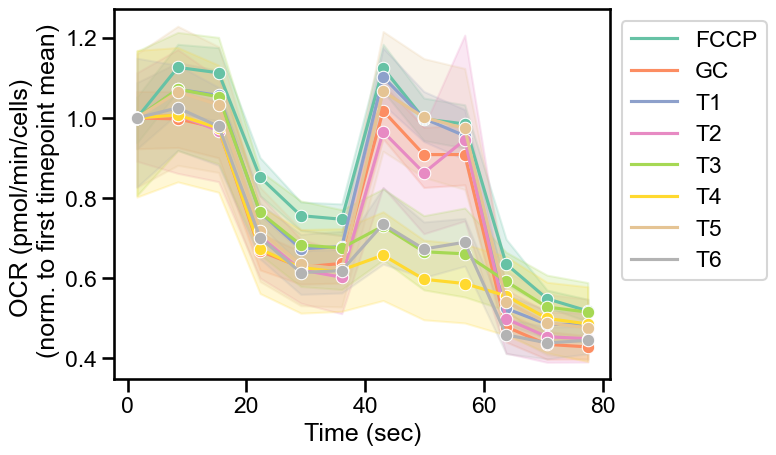

In [20]:
# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Create a line plot 
ax = sns.lineplot(data=df, x='Time', y='Normalized_OCR', hue='Group', style='Group', marker='o', dashes=False, palette="Set2")

# Set plot title and labels
plt.xlabel('Time (sec)')
plt.ylabel('OCR (pmol/min/cells) \n (norm. to first timepoint mean)')

# Move the legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Axis scale
#ax.set_box_aspect(1)
#ax.set_ylim(0.4, 1.5)

# Save the plot
plt.savefig('Seahorse_similar_compounds' + '.pdf', bbox_inches='tight')
plt.show()
